# Assignment - 7

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

import matplotlib.pyplot as plt

In [2]:
# load dataset as Pandas Dataframe
df = pd.read_csv('DataSetForPhishingVSBenignUrl.csv', low_memory=False)

In [3]:
# dimension of the dataset
df.shape

(36707, 80)

In [4]:
# see all the attributes
df.columns

Index(['Querylength', 'domain_token_count', 'path_token_count',
       'avgdomaintokenlen', 'longdomaintokenlen', 'avgpathtokenlen', 'tld',
       'charcompvowels', 'charcompace', 'ldl_url', 'ldl_domain', 'ldl_path',
       'ldl_filename', 'ldl_getArg', 'dld_url', 'dld_domain', 'dld_path',
       'dld_filename', 'dld_getArg', 'urlLen', 'domainlength', 'pathLength',
       'subDirLen', 'fileNameLen', 'this.fileExtLen', 'ArgLen', 'pathurlRatio',
       'ArgUrlRatio', 'argDomanRatio', 'domainUrlRatio', 'pathDomainRatio',
       'argPathRatio', 'executable', 'isPortEighty', 'NumberofDotsinURL',
       'ISIpAddressInDomainName', 'CharacterContinuityRate',
       'LongestVariableValue', 'URL_DigitCount', 'host_DigitCount',
       'Directory_DigitCount', 'File_name_DigitCount', 'Extension_DigitCount',
       'Query_DigitCount', 'URL_Letter_Count', 'host_letter_count',
       'Directory_LetterCount', 'Filename_LetterCount',
       'Extension_LetterCount', 'Query_LetterCount', 'LongestPathToken

In [5]:
# check data types
df.dtypes

Querylength                int64
domain_token_count         int64
path_token_count           int64
avgdomaintokenlen        float64
longdomaintokenlen         int64
                          ...   
Entropy_DirectoryName    float64
Entropy_Filename         float64
Entropy_Extension        float64
Entropy_Afterpath        float64
URL_Type_obf_Type         object
Length: 80, dtype: object

In [6]:
# fixing to display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [7]:
# check data types
df.dtypes

Querylength                          int64
domain_token_count                   int64
path_token_count                     int64
avgdomaintokenlen                  float64
longdomaintokenlen                   int64
avgpathtokenlen                    float64
tld                                  int64
charcompvowels                       int64
charcompace                          int64
ldl_url                              int64
ldl_domain                           int64
ldl_path                             int64
ldl_filename                         int64
ldl_getArg                           int64
dld_url                              int64
dld_domain                           int64
dld_path                             int64
dld_filename                         int64
dld_getArg                           int64
urlLen                               int64
domainlength                         int64
pathLength                           int64
subDirLen                            int64
fileNameLen

In [8]:
# Analyzing data
print("Number of Samples:: ", df.shape[0])
print("Number of features: ", df.shape[1])

Number of Samples::  36707
Number of features:  80


In [9]:
# peek first 10 columns
df.head(10)

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,0,0,0,0,0,0,0,0,0,58,25,26,26,13,1,2,0.448276,0.034483,0.08,0.431034,1.04,0.076923,0,-1,5,-1,0.6,-1,1,0,0,0,1,-1,47,22,8,13,0,-1,13,14,13,5,-1,0,0,3,0,2,-1,0.017241,0.0,0.0,0.066667,1.0,-1.0,8,3,2,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,0,0,0,0,0,0,0,0,0,66,25,34,34,2,2,2,0.515151,0.030303,0.08,0.378788,1.36,0.058824,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,56,22,8,13,9,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,0,0,0,0,0,0,0,0,0,65,25,33,33,2,2,2,0.507692,0.030769,0.08,0.384615,1.32,0.060606,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,55,22,8,13,8,-1,13,14,13,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,0,0,0,0,0,0,0,0,0,109,25,77,77,2,2,2,0.706422,0.018349,0.08,0.229358,3.08,0.025974,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,92,22,8,13,45,-1,52,14,13,13,-1,0,0,4,0,8,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,0,0,0,0,0,0,0,0,0,81,25,49,49,2,2,2,0.604938,0.024691,0.08,0.308642,1.96,0.040816,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,70,22,8,13,23,-1,24,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement
5,0,4,8,5.5,14,6.500000,4,22,10,0,0,0,0,0,0,0,0,0,0,91,25,59,59,2,2,2,0.648352,0.021978,0.08,0.274725,2.36,0.033898,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,78,22,8,13,31,-1,34,14,15,13,-1,0,0,4,0,4,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.666676,0.784493,0.814725,0.755658,0.0,-1.0,Defacement
6,0,4,5,5.5,14,7.800000,4,17,10,0,0,0,0,0,0,0,0,0,0,75,25,43,43,2,2,2,0.573333,0.026667,0.08,0.333333,1.72,0.046512,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,18,14,18,5,-1,0,0,4,0,1,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.682440,0.784493,0.814725,0.766719,0.0,-1.0,Defacement
7,0,4,7,5.5,14,6.285714,4,16,9,0,0,0,0,0,0,0,0,0,0,82,25,50,50,2,2,2,0.609756,0.024390,0.08,0.304878,2.00,0.040000,0,-1,4,-1,0.6,-1,8,0,0,0,8,-1,62,22,8,13,15,-1,25,14,13,13,-1,0,0,4,0,3,-1,0.097561,0.0,0.0,0.320000,NaN,-1.0,8,3,3,0,0,-1,0.709396,0.784493,0.814725,0.797498,0.0,-1.0,Defacement
8,0,4,6,5.5,14,6.500000,4,16,10,0,0,0,0,0,0,0,0,0,0,76,25,44,44,2,2,2,0.578947,0.026316,0.08,0.328947,1.76,0.045455,0,-1,4,-1,0.6,-1,0,0,0,0,0,-1,65,22,8,13,18,-1,19,14,13,13,-1,0,0,4,0,2,-1,0.000000,0.0,0.0,0.000000,NaN,-1.0,8,3,3,0,0,-1,0.678242,0.784493,0.814725,0.732258,0.0,-1.0,Defacement
9,0,4,5,5.5,14,3.600000,4

# NumberRate_Extension and Entropy_Extension has NaN values¶
### there may be more samples with NaN values for more attributes

In [10]:
# peek last 5 columns
df.tail()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,ldl_domain,ldl_path,ldl_filename,ldl_getArg,dld_url,dld_domain,dld_path,dld_filename,dld_getArg,urlLen,domainlength,pathLength,subDirLen,fileNameLen,this.fileExtLen,ArgLen,pathurlRatio,ArgUrlRatio,argDomanRatio,domainUrlRatio,pathDomainRatio,argPathRatio,executable,isPortEighty,NumberofDotsinURL,ISIpAddressInDomainName,CharacterContinuityRate,LongestVariableValue,URL_DigitCount,host_DigitCount,Directory_DigitCount,File_name_DigitCount,Extension_DigitCount,Query_DigitCount,URL_Letter_Count,host_letter_count,Directory_LetterCount,Filename_LetterCount,Extension_LetterCount,Query_LetterCount,LongestPathTokenLength,Domain_LongestWordLength,Path_LongestWordLength,sub-Directory_LongestWordLength,Arguments_LongestWordLength,URL_sensitiveWord,URLQueries_variable,spcharUrl,delimeter_Domain,delimeter_path,delimeter_Count,NumberRate_URL,NumberRate_Domain,NumberRate_DirectoryName,NumberRate_FileName,NumberRate_Extension,NumberRate_AfterPath,SymbolCount_URL,SymbolCount_Domain,SymbolCount_Directoryname,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
36702,29,4,14,5.750000,12,3.666667,4,20,24,3,0,3,0,2,0,0,0,0,0,146,26,113,113,2,2,85,0.773973,0.582192,3.269231,0.178082,4.346154,0.752212,0,-1,5,-1,0.500000,23,31,0,4,0,27,3,94,23,46,7,14,24,43,12,11,11,23,0,3,6,0,2,5,0.212329,0.0,0.064516,0.529412,0.627907,0.066667,19,3,11,3,2,7,0.690555,0.791265,0.777498,0.690227,0.656684,0.796205,spam
36703,0,4,13,3.750000,8,8.461538,4,24,23,0,0,0,0,0,0,0,0,0,0,147,18,122,122,2,2,2,0.829932,0.013605,0.111111,0.122449,6.777778,0.016393,0,-1,5,-1,0.500000,-1,21,0,0,0,21,-1,101,15,7,6,69,-1,105,8,9,9,-1,0,0,3,0,2,-1,0.142857,0.0,0.000000,0.187500,0.200000,-1.000000,23,3,2,16,15,-1,0.665492,0.820010,0.879588,0.674400,0.674671,-1.000000,spam
36704,58,3,27,6.666666,16,3.375000,3,41,34,20,0,20,0,18,12,0,12,0,12,246,22,217,217,2,2,182,0.882114,0.739837,8.272727,0.089431,9.863636,0.838710,0,-1,7,-1,0.772727,58,57,0,6,0,51,1,156,20,71,3,58,48,118,16,12,12,0,0,1,12,0,9,1,0.231707,0.0,0.073171,0.377778,0.418033,0.029412,26,2,14,8,7,9,0.656807,0.801139,0.684777,0.713622,0.717187,0.705245,spam
36705,35,3,13,4.333334,9,3.600000,3,15,13,7,0,7,0,7,4,0,4,0,4,116,15,94,94,2,2,71,0.810345,0.612069,4.733333,0.129310,6.266667,0.755319,0,-1,3,-1,0.666667,32,25,0,0,0,25,23,73,13,4,11,41,12,75,9,8,8,0,0,2,3,0,3,3,0.215517,0.0,0.000000,0.284091,0.333333,0.418182,14,2,1,9,8,3,0.725963,0.897617,0.871049,0.745932,0.758824,0.790772,spam
36706,40,3,25,6.666666,16,3.250000,3,35,31,19,0,19,0,17,6,0,6,0,6,227,22,198,198,2,2,164,0.872247,0.722467,7.454546,0.096916,9.000000,0.828283,0,-1,6,-1,0.772727,40,52,0,6,1,45,2,144,20,50,6,64,31,118,16,10,10,0,0,1,11,0,8,1,0.229075,0.0,0.083333,0.365079,0.381356,0.060000,24,2,13,7,6,7,0.674351,0.801139,0.697282,0.730563,0.731481,0.769238,spam


In [11]:
# statistical summary
print(df.describe())

        Querylength  domain_token_count  path_token_count  avgdomaintokenlen  \
count  36707.000000        36707.000000      36707.000000       36707.000000   
mean      21.908110            2.857439          8.954668           5.401719   
std       94.280669            0.906562          4.278406           1.986858   
min        0.000000            2.000000          0.000000           1.500000   
25%        0.000000            2.000000          6.000000           4.000000   
50%        0.000000            3.000000          8.000000           5.000000   
75%       19.000000            3.000000         11.000000           6.500000   
max     1385.000000           19.000000         68.000000          29.500000   

       longdomaintokenlen  avgpathtokenlen           tld  charcompvowels  \
count        36707.000000     36427.000000  36707.000000    36707.000000   
mean             9.746016         4.556261      2.857439       14.976517   
std              4.856580         2.839388      0.9

In [12]:
# class distribution for original data
print(df.groupby('URL_Type_obf_Type').size())

URL_Type_obf_Type
Defacement    7930
benign        7781
malware       6712
phishing      7586
spam          6698
dtype: int64


In [13]:
# sample distribution print in markdown table format
label = 'URL_Type_obf_Type'
lblTypes = set(df[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df[df[label] == lbl].index)))

| malware | 6712 |
| Defacement | 7930 |
| benign | 7781 |
| spam | 6698 |
| phishing | 7586 |


## Clean Data
- strip whitespace from column names
- dropped samples/rows with Infinity values
- dropped samples/rows with NaN values

In [14]:
# function loads, cleans and returns panda dataframe
def loadAndCleanData(csvFile):
    pickleDump = '{}.pickle'.format(csvFile)
    if os.path.exists(pickleDump):
        df = pd.read_pickle(pickleDump)
    else:
        df = pd.read_csv(csvFile, low_memory=False)
        # clean data
        # strip the whitspaces from column names
        df = df.rename(str.strip, axis='columns')
        #df.drop(columns=[], inplace=True)
        # drop missing values/NaN etc.
        #df.dropna(inplace=True)
        # drop Infinity rows and NaN string from each column
        for col in df.columns:
            indexNames = df[df[col] == 'Infinity'].index
            if not indexNames.empty:
                print('deleting {} rows with Infinity in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
            indexNames = df[df[col]== 'NaN'].index
            if not indexNames.empty:
                print('deleting {} rows with NaN in column {}'.format(len(indexNames), col))
                df.drop(indexNames, inplace=True)
        # drop NaN pandas way
        beforeRows = df.shape[0]
        df.dropna(inplace = True)
        print('Dropped {} rows with NaN values'.format(beforeRows - df.shape[0]))
        df.to_pickle(pickleDump)
        
    return df

In [15]:
df = loadAndCleanData('DataSetForPhishingVSBenignUrl.csv')

In [16]:
# sample distribution print in markdown table format
label = 'URL_Type_obf_Type'
lblTypes = set(df[label])
for lbl in lblTypes:
    print('| {} | {} |'.format(lbl, len(df[df[label] == lbl].index)))

| malware | 4440 |
| Defacement | 2477 |
| benign | 2709 |
| spam | 5342 |
| phishing | 4014 |


## Data Visualization
- works better for dataset with fewer features/attributes
- not suited for current dataset with 79 features

### Common visualizations
- Univariate Plots
    - helps understand each attribute using box and whisker plots
- Histogram Plots
    - helps understand the distribution (Gaussian distribution?) of each attribute

<AxesSubplot:>

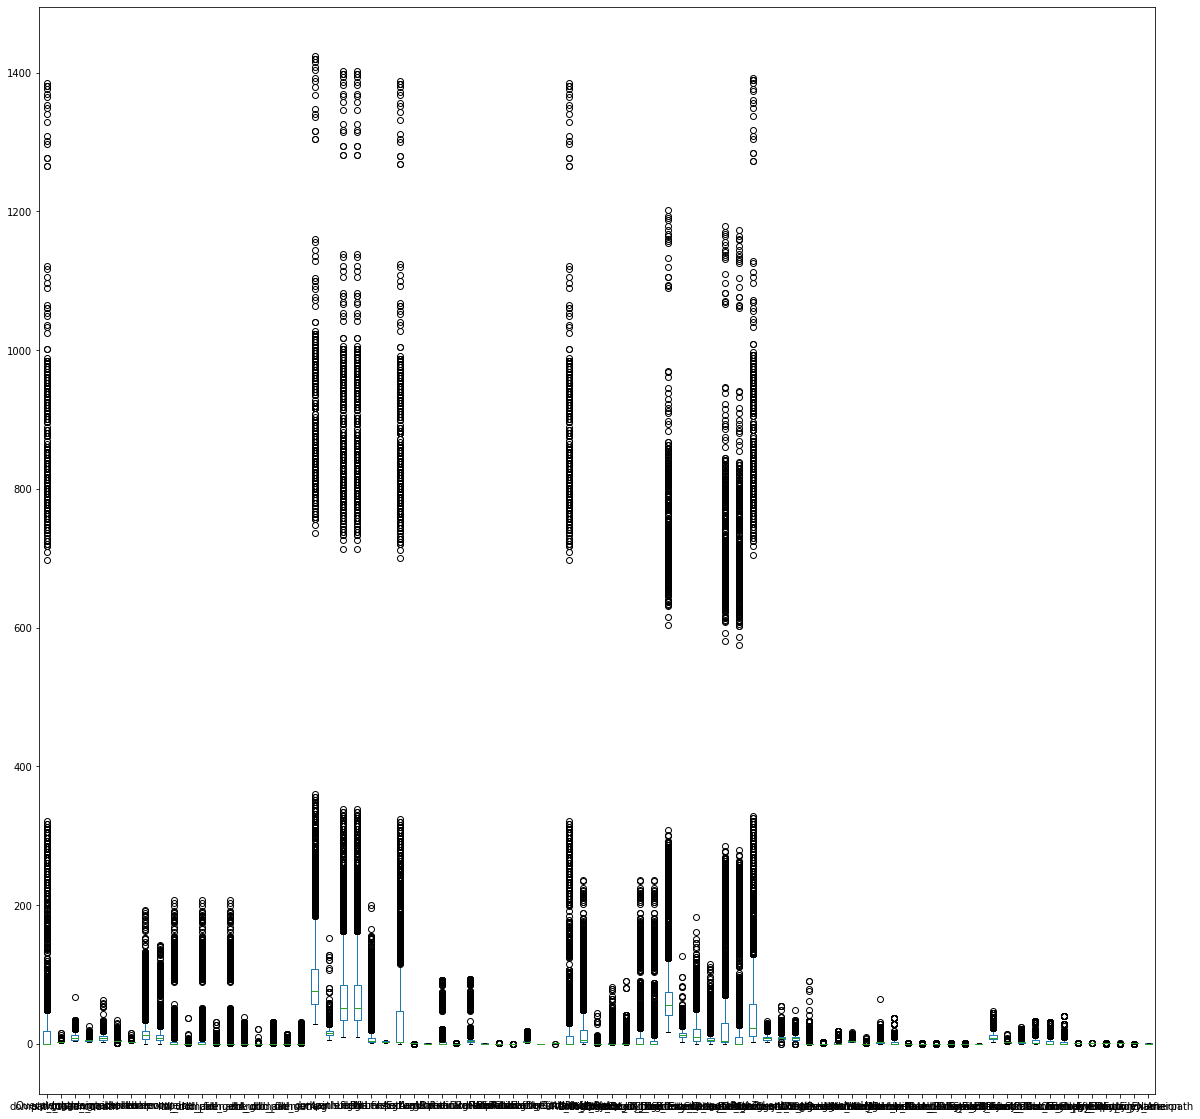

In [17]:
# unvariate plots
df.plot.box(figsize=(20,20))

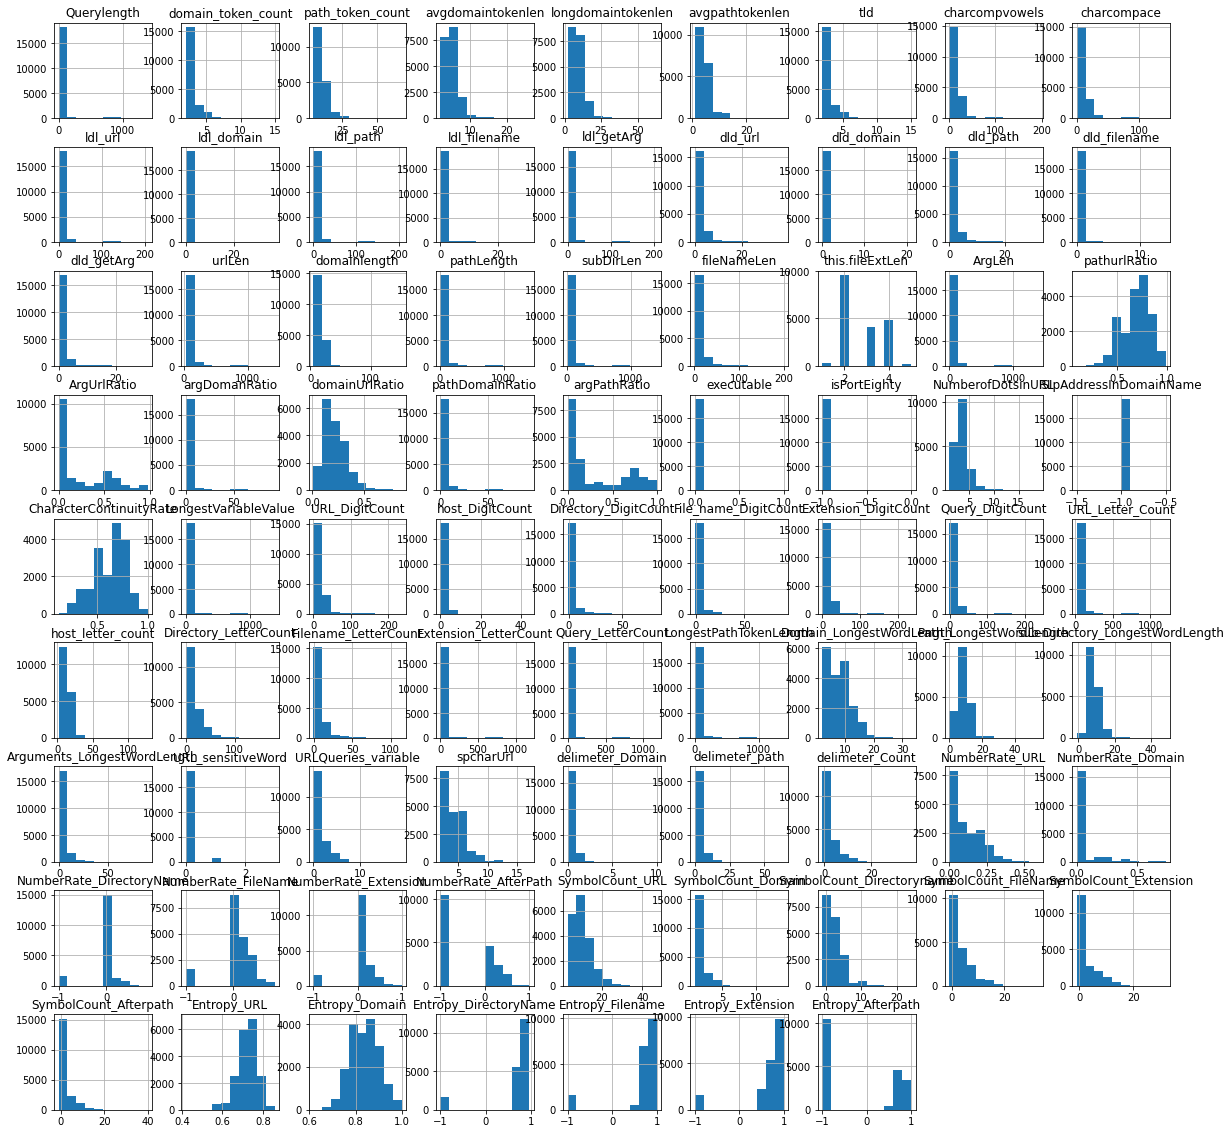

In [18]:
# Histograms of each attribute
df.hist(figsize=(20, 20))
plt.show()

In [19]:
# Splitting the dataset 
# Target variable and train set 
y = df[['URL_Type_obf_Type']] 
X = df.drop(['URL_Type_obf_Type', ], axis = 1) 
  
sc = MinMaxScaler() 
X = sc.fit_transform(X) 
  
# Split test and train data  (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42) 
print(X_train.shape, X_test.shape) 
print(y_train.shape, y_test.shape)

(15185, 79) (3797, 79)
(15185, 1) (3797, 1)


In [20]:
# assigning values to URL_Type_obf_Type based on whether it's phishing or non-phishing in the training data
for i in range(len(y_train.values)):
    if y_train.values[i] == 'phishing':
        y_train.values[i] = 0
    else:
        y_train.values[i] = 1

In [21]:
# assigning values to URL_Type_obf_Type based on whether it's phishing or non-phishing in the testing data
for i in range(len(y_test.values)):
    if y_test.values[i] == 'phishing':
        y_test.values[i] = 0
    else:
        y_test.values[i] = 1

In [22]:
# feature names and class names for tree visualization
feature_names = df.columns[:79]
class_names = ['phishing', 'non-phishing']

In [23]:
# Lists to record prediction accuracies of multiple depths for gini and entropy impurities
gini_prediction_accuracies = []
entropy_prediction_accuracies = []

# Using Gini Impurity

## Using max_depth = 1

In [24]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 1
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=1))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=50))

In [25]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 1
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [26]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 1
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  91.65130366078483


## Using max_depth = 3

In [27]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 3
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=3))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=50))

In [28]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 3
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 3
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  96.49723465894127


## Using max_depth = 6

In [30]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 6
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=6))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6,
                                                         random_state=50))

In [31]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 6
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 6
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  96.6552541480116


## Using max_depth = 9

In [33]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 9
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=9))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                         random_state=50))

In [34]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 9
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [35]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 9
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  96.91861996312878


## Using max_depth = 12

In [36]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 12
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=12))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=12,
                                                         random_state=50))

In [37]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 12
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [38]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 12
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  97.44535159336318


## Using max_depth = 15

In [39]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 15
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=15))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15,
                                                         random_state=50))

In [40]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 15
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 15
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  97.49802475638663


## Using max_depth = 18

In [42]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Gini Index, max_depth - 18
tree_gini = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=18))
y_train = y_train.astype('int') 
tree_gini.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=18,
                                                         random_state=50))

In [43]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 18
y_pred_gini = tree_gini.predict(X_test)
y_pred_gini

array([1, 1, 1, ..., 1, 1, 1])

In [44]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as gini index and max_depth = 18
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_gini)*100
gini_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Gini Index is: ", acurcy)

Accuracy for AdaBoost with criteria as Gini Index is:  97.6033710824335


<br>
<hr>
<hr>
<br>

# Using Entropy Impurity

## Using max_depth = 1

In [45]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 1
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=1))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=1,
                                                         random_state=50))

In [46]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 1
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [47]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 1
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  92.12536212799579


## Using max_depth = 3

In [48]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 3
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=3))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=3,
                                                         random_state=50))

In [49]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 3
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [50]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 3
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  96.1285225177772


## Using max_depth = 6

In [51]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 6
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=6))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=6,
                                                         random_state=50))

In [52]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 6
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [53]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 6
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  97.6033710824335


## Using max_depth = 9

In [54]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 9
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=9))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=9,
                                                         random_state=50))

In [55]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 9
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [56]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 9
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  97.41901501185146


## Using max_depth = 12

In [57]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 12
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=12))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=12,
                                                         random_state=50))

In [58]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 12
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [59]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 12
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  97.78772715301554


## Using max_depth = 15

In [60]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 15
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=15))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=15,
                                                         random_state=50))

In [61]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 15
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [62]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 15
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  97.26099552278114


## Using max_depth = 18

In [63]:
# AdaBoost Classifier with Decision Tree as the base classifier with criteria - Entropy, max_depth - 18
tree_entropy = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=18))
y_train = y_train.astype('int') 
tree_entropy.fit(X_train, y_train.values.ravel())

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=18,
                                                         random_state=50))

In [64]:
# Prediction for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 18
y_pred_entropy = tree_entropy.predict(X_test)
y_pred_entropy

array([1, 1, 1, ..., 1, 1, 1])

In [65]:
# Accuracy for AdaBoost Classifier with Decision Tree as the base classifier with criterion as Entropy and max_depth = 18
y_test = y_test.astype('int')
acurcy = accuracy_score(y_test,y_pred_entropy)*100
entropy_prediction_accuracies.append(acurcy)
print("Accuracy for AdaBoost with criteria as Entropy is: ", acurcy)

Accuracy for AdaBoost with criteria as Entropy is:  95.89149328417172


<hr>

# Comapring Decision Tree Accuracies using Gini and Entropy Impurities with varying tree depths for AdaBoost Classifier

In [66]:
print('Gini Prediction Accuracies with increasing tree depths 1, 3, 6, 9, 12, 15, and 18')
print(gini_prediction_accuracies)
print('\n')
print('Entropy Prediction Accuracies with increasing tree depths 1, 3, 6, 9, 12, 15, and 18')
print(entropy_prediction_accuracies)

Gini Prediction Accuracies with increasing tree depths 1, 3, 6, 9, 12, 15, and 18
[91.65130366078483, 96.49723465894127, 96.6552541480116, 96.91861996312878, 97.44535159336318, 97.49802475638663, 97.6033710824335]


Entropy Prediction Accuracies with increasing tree depths 1, 3, 6, 9, 12, 15, and 18
[92.12536212799579, 96.1285225177772, 97.6033710824335, 97.41901501185146, 97.78772715301554, 97.26099552278114, 95.89149328417172]


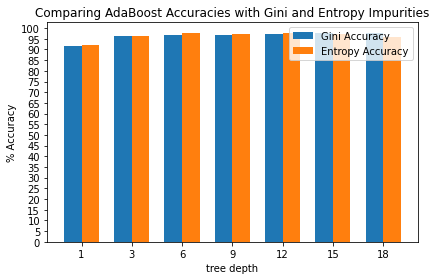

In [67]:
tree_depths = ['1', '3', '6', '9', '12', '15', '18']
x = np.arange(len(tree_depths))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gini_prediction_accuracies, width, label='Gini Accuracy')
rects2 = ax.bar(x + width/2, entropy_prediction_accuracies, width, label='Entropy Accuracy')
ax.set_ylabel('% Accuracy')
ax.set_xlabel('tree depth')
ax.set_title('Comparing AdaBoost Accuracies with Gini and Entropy Impurities')
ax.set_xticks(x)
ax.set_xticklabels(tree_depths)
ax.legend()

plt.yticks(np.arange(101, step=5))
fig.tight_layout()

plt.show()

### As we can see here, in AdaBoost Classifier, for gini index, the prediction accuracies are increasing with increasing tree depths. For Entropy Index, same as gini index, the prediction accuracies are increasing till tree depth of 6 and then it follows a zig-zag by going down and up and then goes down for depths 15 and 18.

<br>
<hr>
<br>

# Comapring Decision Tree Accuracies using Gini and Entropy Impurities with varying tree depths for Decision Tree Classifier from Assignment 5

Gini Prediction Accuracies with increasing tree depths from 1 to 6
[84.11904134843297, 85.98893863576508, 86.62101659204635, 88.93863576507769, 89.70239662891757, 90.36081116671056]


Entropy Prediction Accuracies with increasing tree depths from 1 to 6
[78.06162760073742, 84.72478272320252, 85.54121675006584, 86.06794838030024, 90.30813800368712, 90.49249407426916]


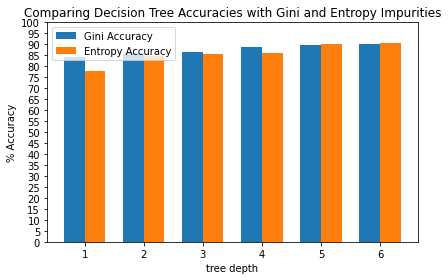

In [69]:
print('Gini Prediction Accuracies with increasing tree depths from 1 to 6')
gini_prediction_accuracies = [84.11904134843297, 85.98893863576508, 86.62101659204635, 88.93863576507769, 89.70239662891757, 90.36081116671056]
print(gini_prediction_accuracies)
print('\n')

print('Entropy Prediction Accuracies with increasing tree depths from 1 to 6')
entropy_prediction_accuracies = [78.06162760073742, 84.72478272320252, 85.54121675006584, 86.06794838030024, 90.30813800368712, 90.49249407426916]
print(entropy_prediction_accuracies)

tree_depths = ['1', '2', '3', '4', '5', '6']
x = np.arange(len(tree_depths))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, gini_prediction_accuracies, width, label='Gini Accuracy')
rects2 = ax.bar(x + width/2, entropy_prediction_accuracies, width, label='Entropy Accuracy')
ax.set_ylabel('% Accuracy')
ax.set_xlabel('tree depth')
ax.set_title('Comparing Decision Tree Accuracies with Gini and Entropy Impurities')
ax.set_xticks(x)
ax.set_xticklabels(tree_depths)
ax.legend()

plt.yticks(np.arange(101, step=5))
fig.tight_layout()

plt.show()

<br>
<hr>
<hr>
<br>

# Comparing results from AdaBoost and Decision Tree Classifier

## Conclusion

## Prediction Accuracies in case of Adaboost Classifier are higher than Decision Tree Classifier for both gini as well as entropy index. We can see from the above plotted bar graphs for Adaboost and Decision Tree that for common tree depths of 1, 3, and 6, the prediction accuracies in case of Adaboost are almost 6% greater than that of Decision Trees.